# Sprawozdanie 5
# Jan Izydorczyk

In [1]:
from numpy import float32,float64,log2
import sys
from matplotlib import pyplot as plt
import math
import numpy as np
import random
import scipy
import mpmath as mp
from mpmath import mpf, nstr, nprint
%matplotlib notebook

print("Wersja Pythona:")
print (sys.version)
print(f"Wersja numpy: {np.__version__}")
print("Konfiguracja liczb zmiennoprzecinkowych")
print(sys.float_info)

f64 = np.float64
f32 = np.float32

Wersja Pythona:
3.9.4 (tags/v3.9.4:1f2e308, Apr  6 2021, 13:40:21) [MSC v.1928 64 bit (AMD64)]
Wersja numpy: 1.20.2
Konfiguracja liczb zmiennoprzecinkowych
sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


In [2]:
print(mp.mp)

Mpmath settings:
  mp.prec = 53                [default: 53]
  mp.dps = 15                 [default: 15]
  mp.trap_complex = False     [default: False]


In [26]:
def f_1(x): return mp.cos(x) * mp.cosh(x) - mpf(1)
def f_2(x): return mpf(1) / mpf(x) - mp.tan(x)
def f_3(x): return mpf(2) ** mpf(-x) + mp.exp(x) + mpf(2) * mp.cos(x) - mpf(6)

In [28]:
def f1(): return f_1, mp.pi * mpf(3) / mpf(2), mpf(2) * mp.pi
def f2(): return f_2, mpf('1e-20'), mp.pi / mpf(2) - mpf('1e-20')
def f3(): return f_3, mpf(1), mpf(3)

# Zadanie 1

In [4]:
def bisection(f, prec, l, r, epsilon):
    steps = 1
    if(f(l) * f(r) > 0):
        print('Bad interval')
        return None
    xs = []
    with mp.workdps(prec):  
        while (r - l) / mpf(2) > epsilon:
            steps += 1
            m = l + (r - l) / mpf(2)
            xs.append(m)
            f_m = f(m)

            # print(f'{nstr(f(l), 3)}, {nstr(f_m, 3)}, {nstr(f(r), 3)}')

            if f(l) * f_m < mpf(0):
                r = m
            elif f(r) * f_m:
                l = m
            else:
                return m, f(m), steps, xs
        m = l + (r - l) / mpf(2)
        xs.append(m)
        return m, f(m), steps, xs

In [13]:
from math import floor, log, ceil

In [14]:
def print_bis(f, l, r, epsilon):
    precision = 50
    x, f_x, steps, _ = bisection(f, precision, l, r, epsilon)
    print(f'Precision = {precision}, epsilon = {nstr(epsilon, 3)}')
    print(f'Interval = [{nstr(l, 3)}, {nstr(r, 3)}]')    
    prec = ceil(- log(epsilon) / log(10))
    print(f'X = ', end=''); mp.nprint(x, prec)
    print(f'f(X) = ' , end=''); mp.nprint(f_x, 3)
    print(f'after {steps} steps.')    

In [31]:
%pip install pandas
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [32]:
from itertools import product

data = []
precision = 50
    
for fun, eps in product ([f1, f2, f3], [-7, -15, -33]):
    f, l, r = fun()
    epsilon = mpf(f'1e{eps}')
    x, f_x, steps, _ = bisection(f, precision, l, r, epsilon)
    prec = ceil(- log(epsilon) / log(10))
    data.append([str(fun.__name__), f'1e{eps}', nstr(x, prec), nstr(f_x, 3), str(steps)])

pd.DataFrame(data, columns=['Name', 'Epsilon', 'x', 'f(x)', 'Steps'])

,Name,Epsilon,x,f(x),Steps
0,f1,1e-7,4.730041,-1.79e-6,24
1,f1,1e-15,4.7300407448627,-8.44e-15,51
2,f1,1e-33,4.73004074486270402602404810083388,7.58e-33,111
3,f2,1e-7,0.8603336,1.24e-7,24
4,f2,1e-15,0.86033358901938,9.4e-16,51
5,f2,1e-33,0.860333589019379762483893424137662,1.3e-33,111
6,f3,1e-7,1.829384,-2.04e-7,25
7,f3,1e-15,1.82938360193385,2.44e-15,51
8,f3,1e-33,1.82938360193384881713621294681415,8.7e-34,111


Wraz ze wzrostem kolejnych rzędów epsilon liczba potzrebnych iteracji rośnie liniowo.

In [23]:
import colorsys

In [37]:
def scale_saturation(c, scale):
    r,g,b = c
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    return colorsys.hls_to_rgb(h, l, min(1, s * scale))

In [38]:
def apply_fun(f, *args):
    return np.array(list(map(f, *args)))

In [63]:
def plot_convergence(f, l, r, title="", c=(1, 0, 0)):
    precision = 50
    
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))
    
    for ax, eps in zip(axs, [-7, -15, -31]):
        epsilon = mpf(f'1e{eps}')
        x_f, f_x_f, steps, xs = bisection(f, precision, l, r, epsilon)
        sat = np.linspace(0, 1, len(xs))
        sat = 1 - (sat-1)**2
        cs = list(map(lambda s: scale_saturation(c, s), sat))
        x = np.linspace(float(l), float(r), 1000)
        y = apply_fun(f, x)
        ax.plot(x, y, zorder=-1)
        ax.scatter(xs, apply_fun(f, xs), s=4, zorder=1, c=cs)
        ax.scatter([x_f], [f_x_f], s=16, zorder=0, color=(0, 1, 0), marker='x')
        ax.set_ylim(-30, 30)
        #
        ax.set_title(f'Eps={nstr(epsilon, 3)} Steps={steps}')
    fig.suptitle(f'{title}\nPrec={nstr(precision, 3)} Int=[{nstr(l, 3)}, {nstr(r, 3)}]')
    fig.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


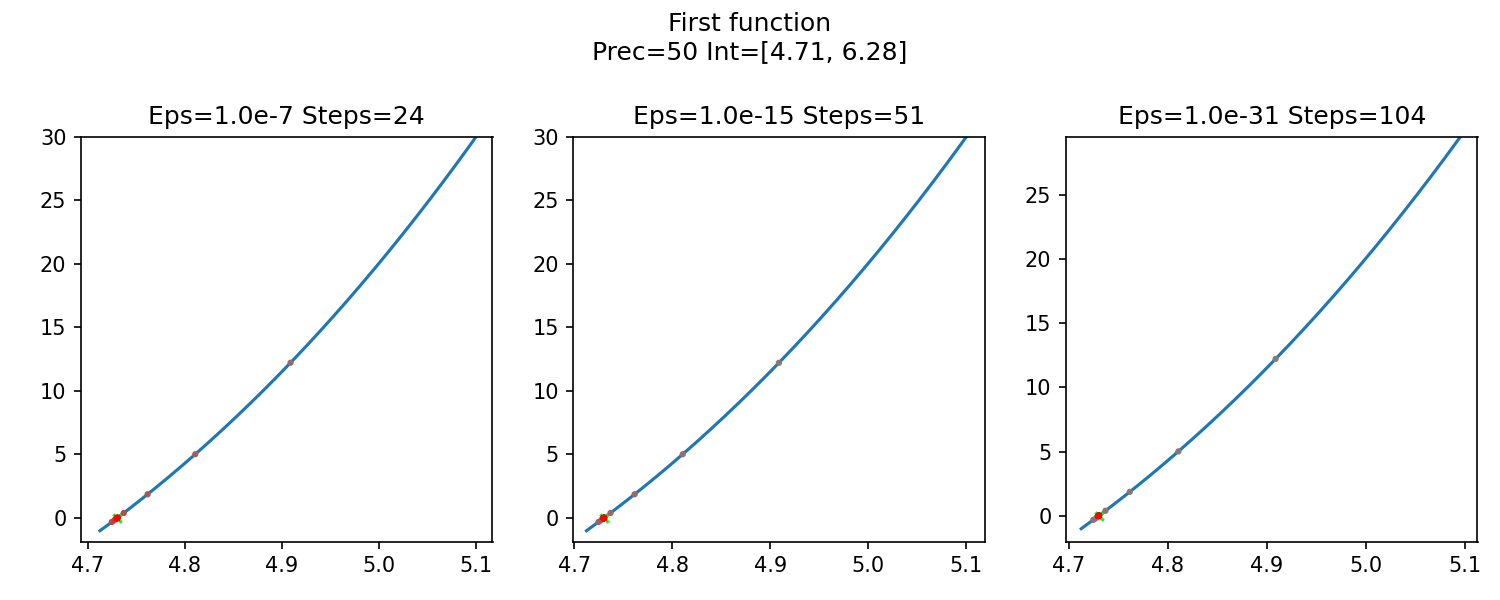

In [64]:
f, l,r = f1()
plot_convergence(f, l, r, title='First function')

<IPython.core.display.Javascript object>


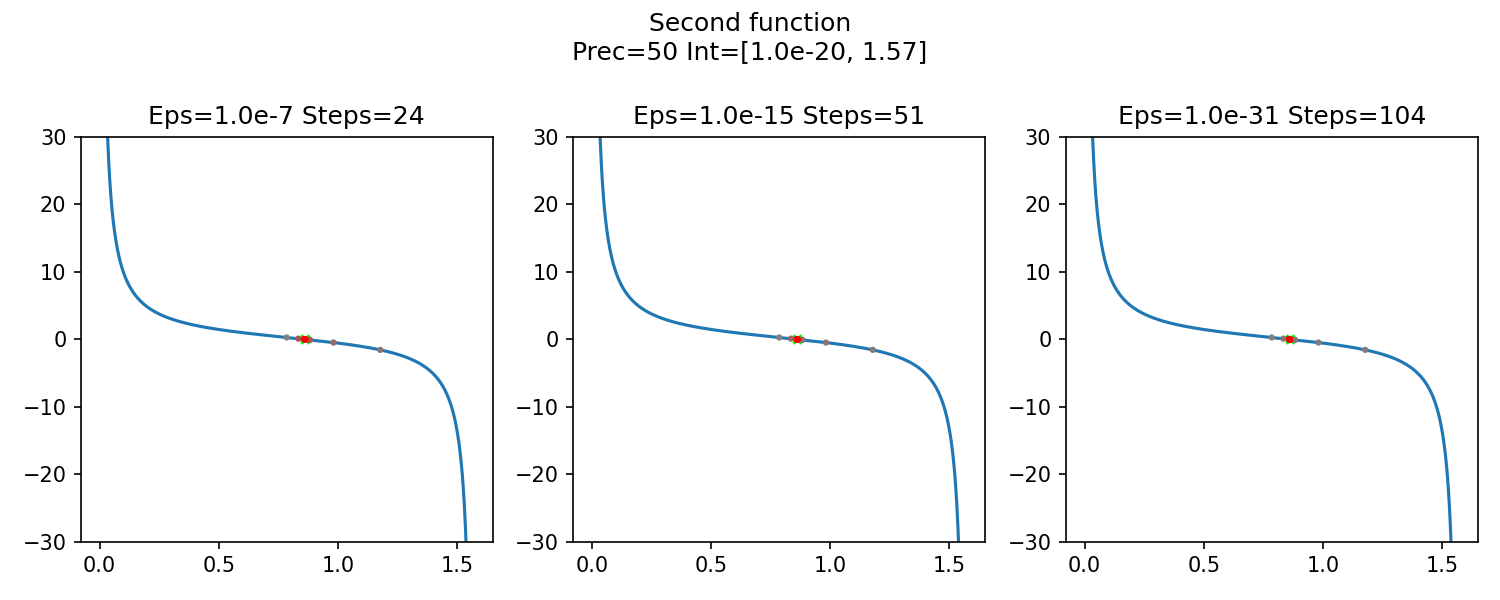

In [62]:
f, l, r = f2()
plot_convergence(f, l, r, title='Second function')

<IPython.core.display.Javascript object>


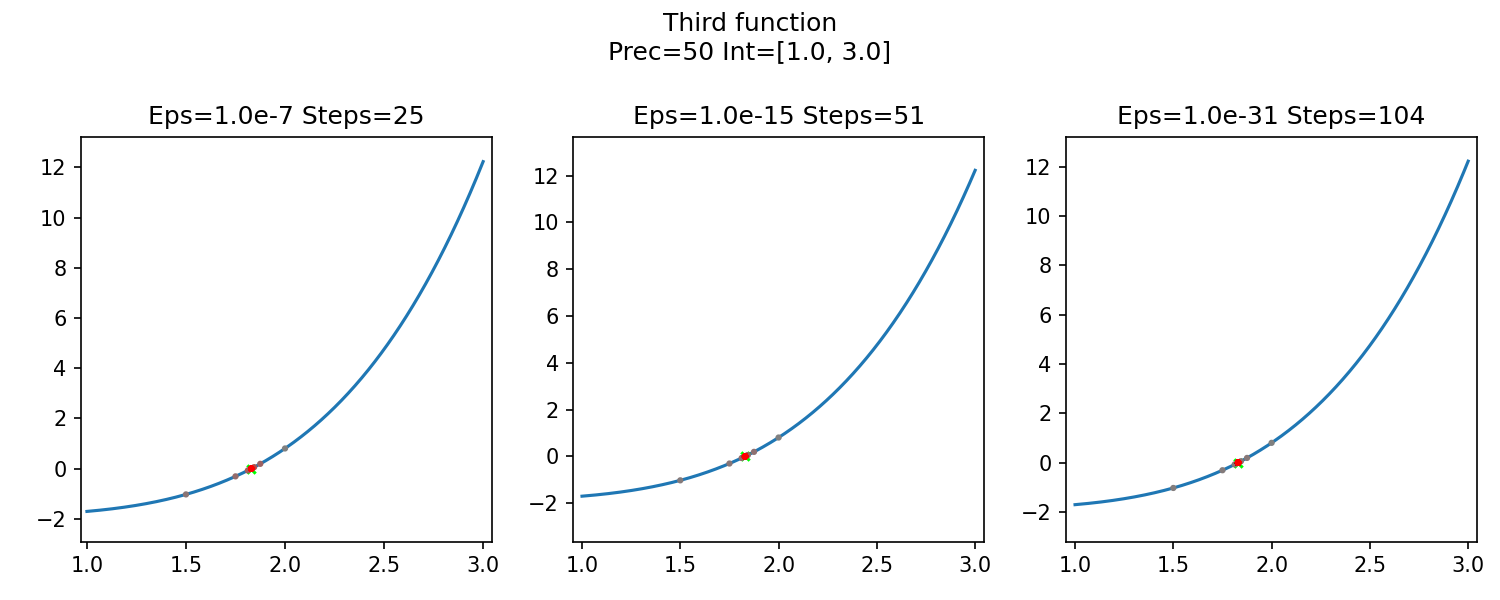

In [65]:
f, l, r = f3()
plot_convergence(f, l, r, title='Third function')

Pierwsze iteracji są położone względnie daleko od siebie, żeby coraz bardziej zbiegać do pierwiastka funkcji.

In [66]:
from math import log, ceil

def plot_steps(f, l, r, max_eps, min_eps, n_tests, title=""):
    precision = 50
    epss = np.logspace(min_eps, max_eps, n_tests)
    steps = []
    pred_steps = []
    for epsilon in epss:
        _, _, stp, _ = bisection(f, precision, l, r, mpf(epsilon))
        steps.append(stp)
        pred_steps.append(ceil(log((r - l)/epsilon) / log(2)))
    plt.scatter(epss, steps, s=16, zorder=1, marker='x', label='Function steps')
    plt.scatter(epss, pred_steps, s=4, zorder=2, label='Predicted steps')
    plt.legend()
    plt.xscale('log')
    plt.xlabel('Epsilon')
    plt.ylabel('Steps')
    plt.title(f'Numbers of steps for epsilon\n{title}\nPrec={nstr(precision, 3)} Eps$\in$[1e{min_eps}, 1e{max_eps}] Int=[{nstr(l, 3)}, {nstr(r, 3)}]')
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


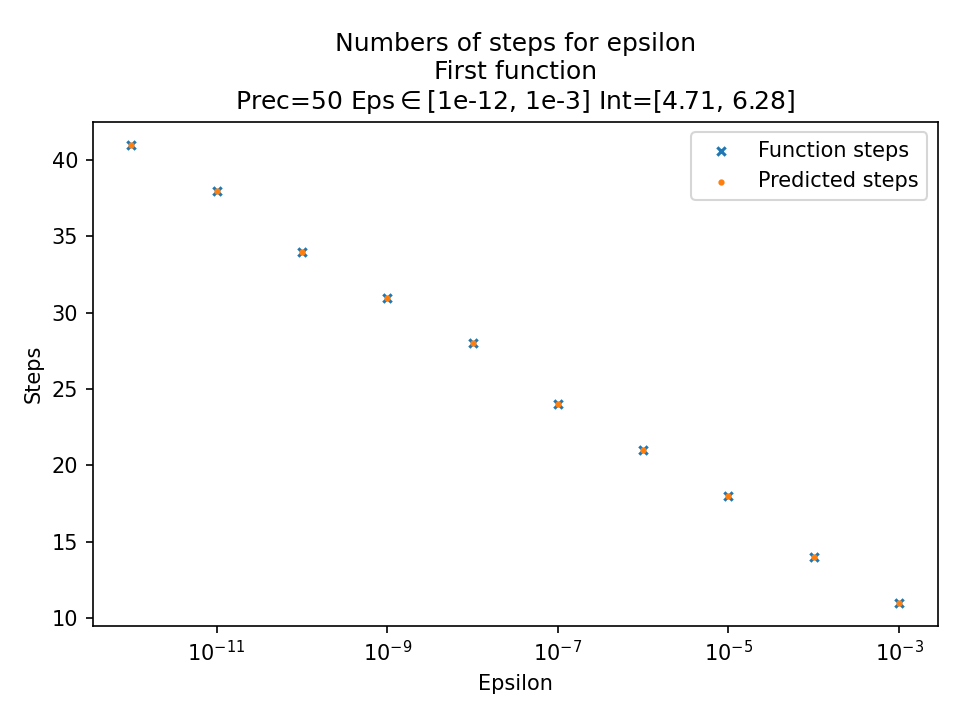

In [68]:
f, l, r = f1()
plot_steps(f, l, r, -3, -12, 10, title='First function')

<IPython.core.display.Javascript object>


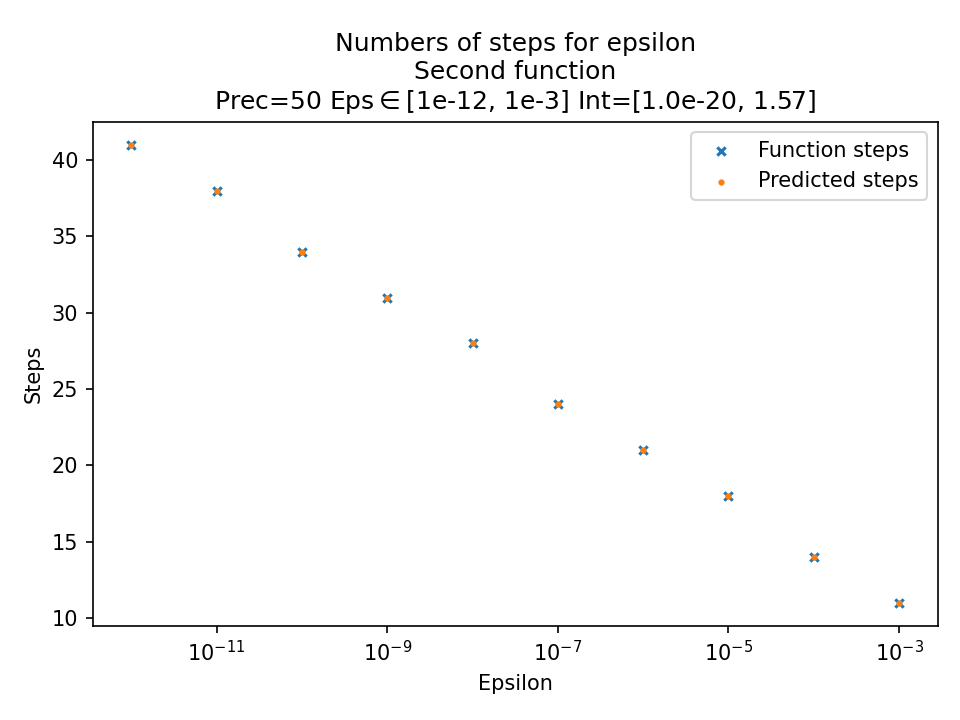

In [72]:
f, l, r = f2()
plot_steps(f, l, r, -3, -12, 10, title='Second function')

Tak jak wczśniej wspomniane, liczba wymaganaych kroków rośnie liniowo względem kolejnych rzędów $\epsilon$.

Liczba kroków zgadza się z wartościami przewidywanymi.

<IPython.core.display.Javascript object>


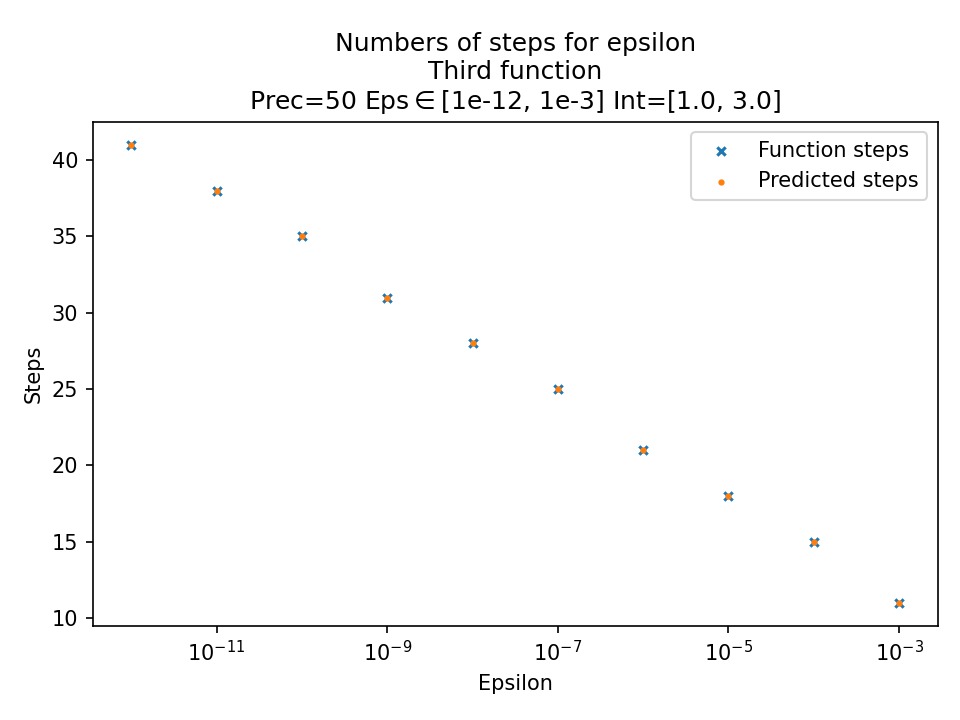

In [73]:
f, l, r = f3()
plot_steps(f, l, r, -3, -12, 10, title='Third function')

# Newton

$f_1'(x) = \cos(x)\sinh(x) - \sin(x)\cosh(x)$

$f_2'(x) = -\frac{1}{x^2} - \frac{1}{\cos^2(x)}$

$f_3'(x) = -2^{-x}\log(2) + e^x - 2\sin(x)$

In [81]:
def df_1(x): return mp.cos(x) * mp.sinh(x) - mp.sin(x)*mp.cosh(x)
def df_2(x): return mpf(-1) / mpf(x)**2 - mpf(1)/(mp.cos(x)**2)
def df_3(x): return - mp.log(2) * mpf(2) ** mpf(-x) + mp.exp(x) - mpf(2) * mp.sin(x)

In [82]:
def df1(): return *f1(), df_1
def df2(): return *f2(), df_2 
def df3(): return *f3(), df_3

In [83]:
def newton(f, df, prec, l, r, epsilon=None, max_steps=None):
    steps = 0
    if(f(l) * f(r) > 0):
        print('Bad interval')
        return None
    if not epsilon and not max_steps:
        print('Bad predicat')
        return None
    x_k = l + (r - l) / mpf(2)
    last_xk = None
    xs = []
    with mp.workdps(prec):  
        while last_xk is None or ( abs(last_xk - x_k) * mpf(0.5) > epsilon if epsilon else steps < max_steps):
            steps += 1
            last_xk = x_k
            x_k = x_k - f(x_k)/df(x_k)
            xs.append(x_k)
            f_xk = f(x_k)
        return x_k, f(x_k), steps, xs

In [84]:
def print_newton(f, df, l, r, epsilon=None, max_steps=None):
    precision = 50
    x, f_x, steps, _ = newton(f, df, precision, l, r, epsilon=epsilon, max_steps=max_steps)
    print(f'Precison = {precision}, epsilon = {nstr(epsilon, 3)}')
    print(f'Interval = [{nstr(l, 3)}, {nstr(r, 3)}]')    
    prec = ceil(- log(epsilon) / log(10))
    print(f'X = ', end=''); mp.nprint(x, prec)
    print(f'f(X) = ' , end=''); mp.nprint(f_x, 3)
    print(f'after {steps} steps.')  

In [85]:
from itertools import product

data = []
precision = 50
    
for fun, eps in product ([df1, df2, df3], [-7, -15, -33]):
    f, l, r, df = fun()
    epsilon = mpf(f'1e{eps}')
    x, f_x, steps, _ = newton(f, df, precision, l, r, epsilon=epsilon, max_steps=None)
    prec = ceil(- log(epsilon) / log(10))
    data.append([str(fun.__name__), f'1e{eps}', nstr(x, prec), nstr(f_x, 3), str(steps)])

pd.DataFrame(data, columns=['Name', 'Epsilon', 'x', 'f(x)', 'Steps'])

,Name,Epsilon,x,f(x),Steps
0,df1,1e-7,4.730041,1.21e-19,6
1,df1,1e-15,4.7300407448627,2.51e-40,7
2,df1,1e-33,4.73004074486270402602404810083388,2.14e-50,8
3,df2,1e-7,0.8603336,-8.55e-15,3
4,df2,1e-15,0.86033358901938,0.0,5
5,df2,1e-33,0.860333589019379762483893424137662,0.0,6
6,df3,1e-7,1.829384,4.41e-14,4
7,df3,1e-15,1.82938360193385,0.0,6
8,df3,1e-33,1.82938360193384881713621294681415,0.0,7


Znacznie lepszy poziom zbieżności, dla tej samej dokładności co w metodzie bisecji należy wykonać znacznie mniej kroków.

In [86]:
def plot_newton_convergence(f, l, r, df, title="", c=(1, 0, 0)):
    precision = 50
    
    fig, axs = plt.subplots(1, 3, figsize=(10, 4))
    
    for ax, eps in zip(axs, [-7, -15, -31]):
        epsilon = mpf(f'1e{eps}')
        x_f, f_x_f, steps, xs = newton(f, df, precision, l, r, epsilon=epsilon, max_steps=None)
        sat = np.linspace(0, 1, len(xs))
        sat = 1 - (sat-1)**2
        cs = list(map(lambda s: scale_saturation(c, s), sat))
        x = np.linspace(float(l), float(r), 1000)
        y = apply_fun(f, x)
        ax.plot(x, y, zorder=-1)
        ax.scatter(xs, apply_fun(f, xs), s=4, zorder=1, c=cs)
        ax.scatter([x_f], [f_x_f], s=16, zorder=0, color=(0, 1, 0), marker='x')
        ax.set_ylim(-30, 30)
        ax.set_title(f'Eps={nstr(epsilon, 3)} Steps={steps}')
    fig.suptitle(f'{title}\nPrec={nstr(precision, 3)} Int=[{nstr(l, 3)}, {nstr(r, 3)}]')
    fig.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


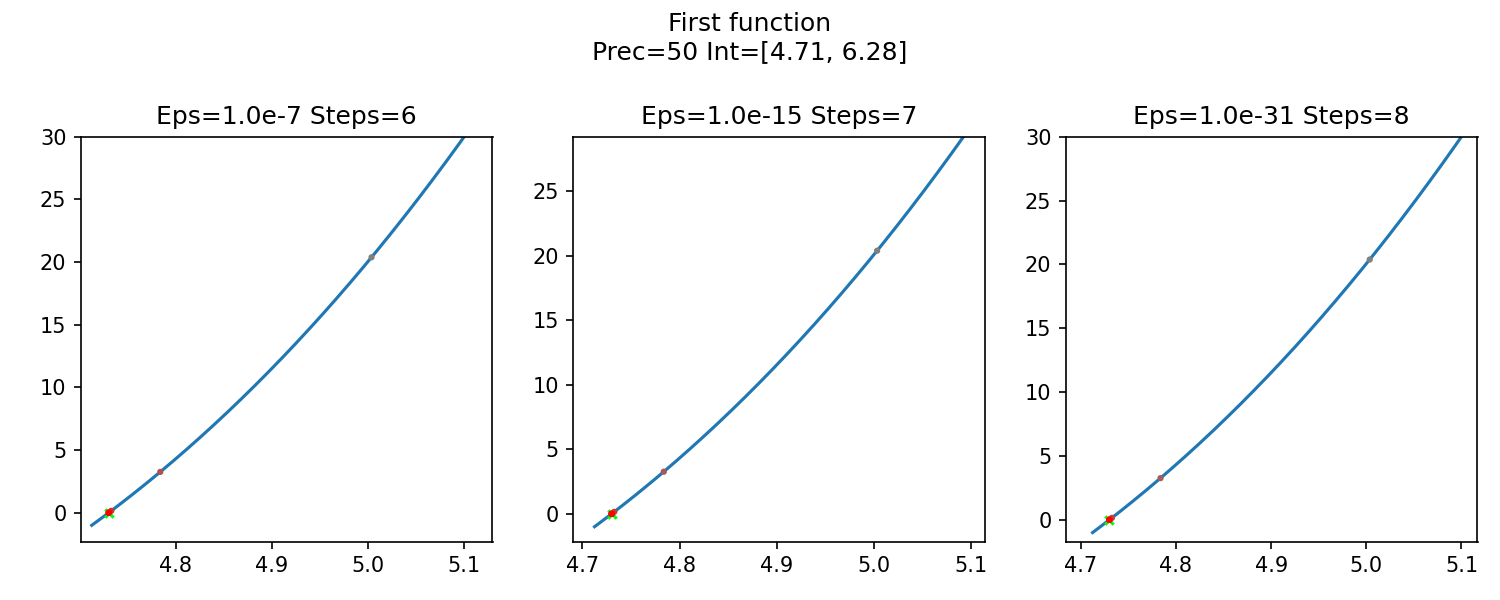

In [87]:
plot_newton_convergence(*df1(), title='First function')

<IPython.core.display.Javascript object>


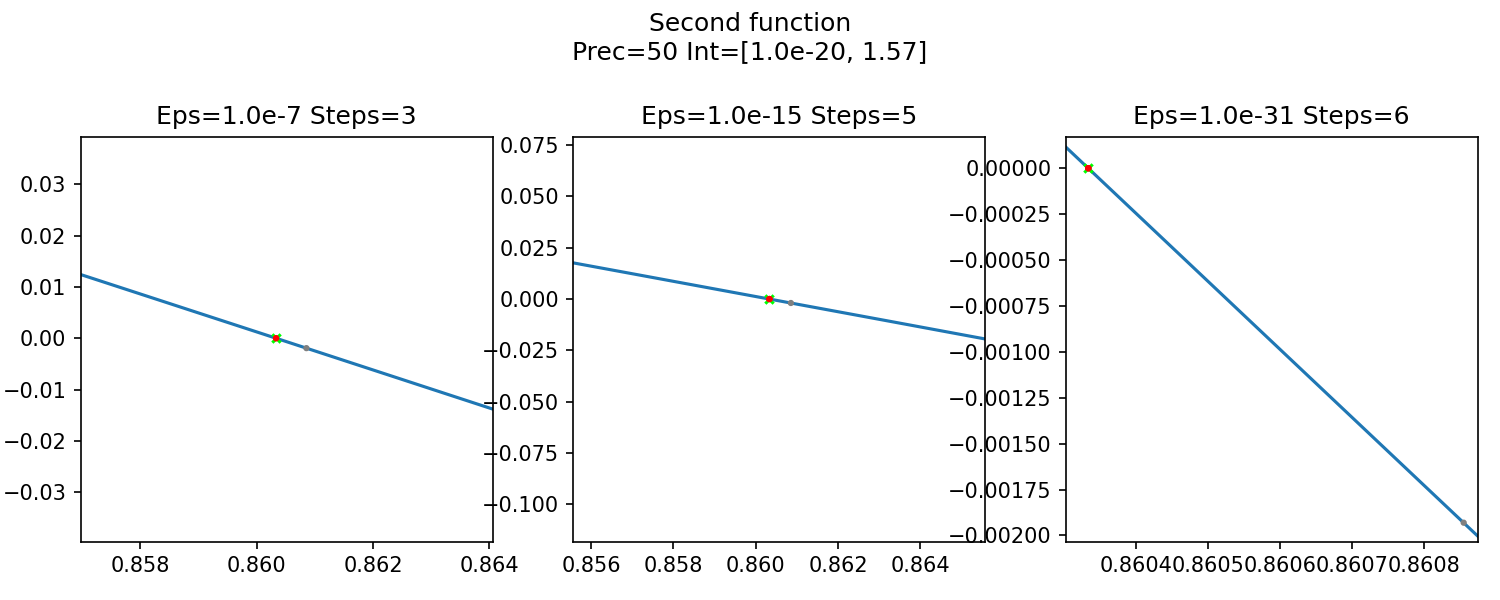

In [89]:
plot_newton_convergence(*df2(), title='Second function')

<IPython.core.display.Javascript object>


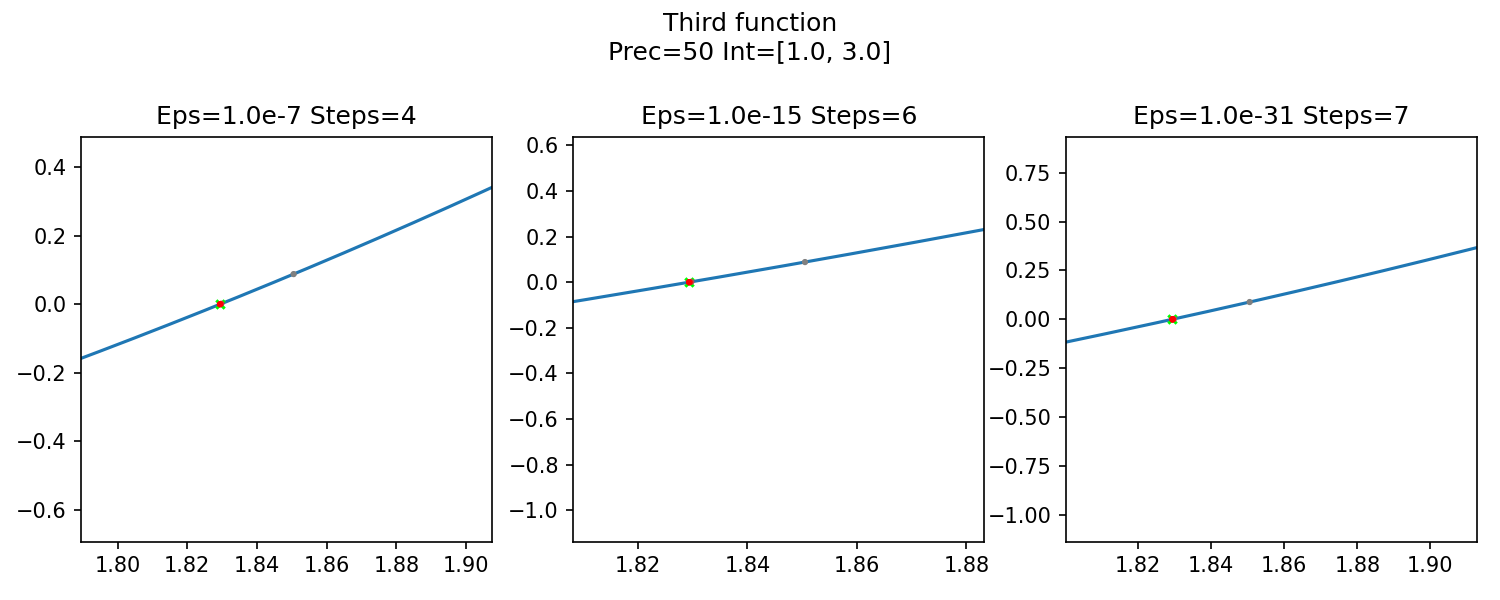

In [90]:
plot_newton_convergence(*df3(), title='Third function')

Zbiezność Newtona jest znacznie lepsza, niż metody bisecji. Wartości zbiegają w ekspresowym tempie do pierwiastka, kumulując się w jego bliskim otoczeniu.

In [104]:
from math import log, ceil

def plot_steps(f, l, r, df, max_eps, min_eps, n_tests, title=""):
    precision = 50
    epss = np.logspace(min_eps, max_eps, n_tests)
    steps = []
    for epsilon in epss:
        _, _, stp, _ = newton(f, df, precision, l, r, epsilon=epsilon, max_steps=None)
        steps.append(stp)
    plt.scatter(epss, steps, s=16, zorder=1, marker='x', label=f'{title} steps')
    plt.legend()
    plt.xscale('log')
    plt.xlabel('Epsilon')
    plt.ylabel('Steps')
    plt.title(f'Numbers of steps for epsilon\n{title}\nPrec={nstr(precision, 3)} Eps$\in$[1e{min_eps}, 1e{max_eps}] Int=[{nstr(l, 3)}, {nstr(r, 3)}]')
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>


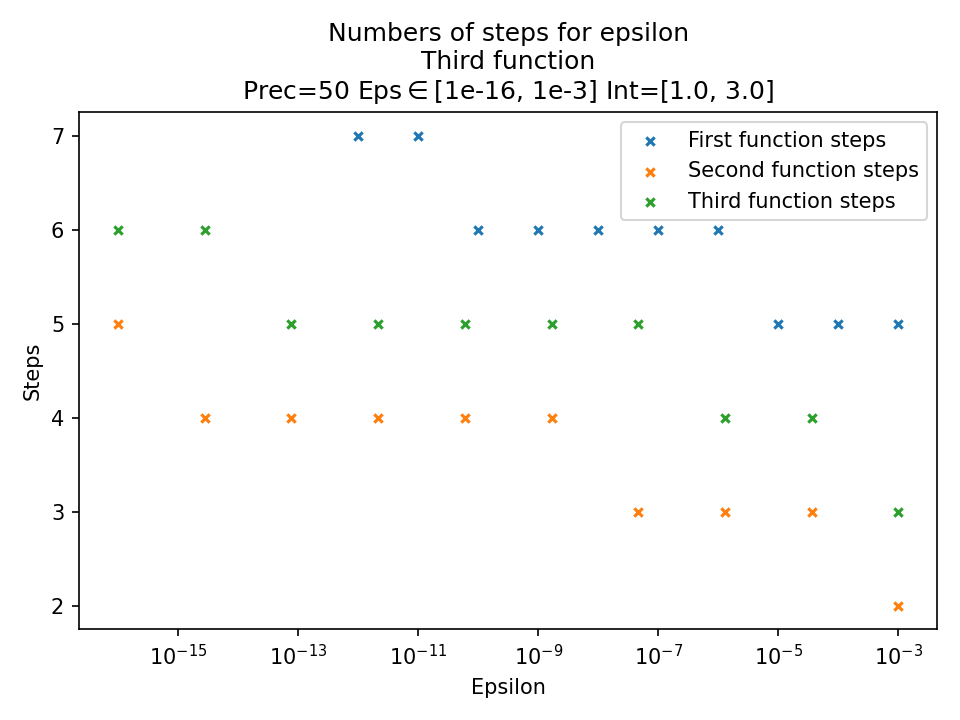

In [105]:
plot_steps(*df1(), -3, -12, 10, title='First function')
plot_steps(*df2(), -3, -16, 10, title='Second function')
plot_steps(*df3(), -3, -16, 10, title='Third function')

Liczba kroków rośnie schodkowo względem wykładnika $\epsilon$, funkcja będzie przypominała funckje pierwiastkową, ponieważ zbieżność metody Newtona wynosi $O(n^2)$.